**Aula:** Support Vector Machine (SVM)

**Docente:** Fernando Pereira dos Santos

# **1 - Introdução:**

O funcionamento de uma SVM pode ser descrito da seguinte forma: 
- dadas duas classes e um conjunto de pontos que pertencem a essas classes, **determina-se o hiperplano** que separa os pontos de forma a colocar o maior número de pontos de uma mesma classe em um mesmo lado, enquanto maximiza a distância de cada classe a esse hiperplano. 
- a distância de uma classe a um hiperplano é a menor distância entre ele e os pontos dessa classe, sendo chamada de **margem de separação**. 
- o hiperplano gerado pela SVM é determinado por um subconjunto dos pontos das duas classes, chamados de **vetores de suporte**. 

**Exemplo:**
- Considere um conjunto de dados cujos pontos pertencem a duas classes distintas (quadrados amarelos e círculos vermelhos) em apenas duas dimensões ($X_1$ e $X_2$). 
- Inicialmente, podemos traçar **diversos hiperplanos** que possibilitem a separação das classes. Entretanto, SVM se propõe a encontrar o **hiperplano ótimo** que possibilite a maximização da distância entre as classes. Assim, os pontos contidos nas margens são chamados de vetores de suporte.
- **O objetivo é encontrar o hiperplano separador entre as duas classes.** Ao encontrar o hiperplano separador, baseando-se no conjunto de treinamento, o modelo pode ser generalizado e dados não vistos podem ser classificados.
- Infinitos hiperplanos podem ser selecionados. Contudo, o que possibilitará **melhor generalização é aquele que maximiza a distância entre as classes** (linha verde tracejada).



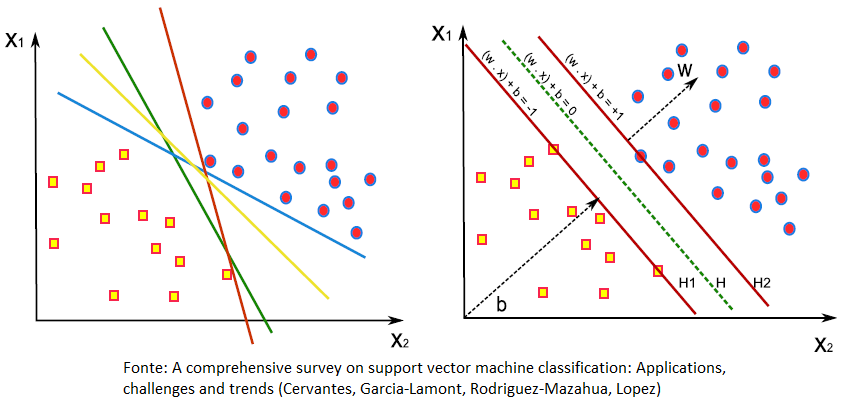

In [ ]:
# carregando o dataset
import numpy as np
from sklearn.datasets import load_iris

# lendo dados da iris: em https://scikit-learn.org/stable/datasets.html temos diversos datasets diferentes para estudo.
iris = load_iris()
X = iris.data
Y = iris.target

print("Conjunto de dados", X.shape)
print("Conjunto de rótulos", Y.shape)
print("Quantidade distintos de rótulos", np.unique(Y))
print("\nPrimeira instância", X[0])
print("Primeiro rótulo", Y[0])

Conjunto de dados (150, 4)
Conjunto de rótulos (150,)
Quantidade distintos de rótulos [0 1 2]

Primeira instância [5.1 3.5 1.4 0.2]
Primeiro rótulo 0


In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#definição do cross-validation
numeroFolds = 5
kf = KFold(n_splits=numeroFolds, shuffle=True)

svm = SVC(kernel='linear')
scores = cross_val_score(svm, X, Y, cv=kf)
print('Acurácia com SVM Linear: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

svm = SVC(kernel='rbf')
scores = cross_val_score(svm, X, Y, cv=kf)
print('Acurácia com SVM RBF: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

svm = SVC(kernel='poly', degree=3)
scores = cross_val_score(svm, X, Y, cv=kf)
print('Acurácia com SVM Poly: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

Acurácia com SVM Linear: 0.9933 +/- 0.0133
Acurácia com SVM RBF: 0.9533 +/- 0.0400
Acurácia com SVM Poly: 0.9733 +/- 0.0389


# **2 - Máquinas de Vetor de Suporte lineares:**

Constroem um conjunto de hiperplanos cujos limites da dimensão VC possam ser computados, utilizando o Princípio de Minimização do Risco Estrutural para identificar o hiperplano ótimo que maximize a margem dos exemplos mais próximos, sendo equivalente a minimizar o limite da dimensão VC.

No caso de padrões separáveis, a Máquina de Vetor de Suporte tem valor zero para a taxa de erro de treinamento e minimiza a dimensão VC.

O treinamento consiste em achar um hiperplano que separe perfeitamente os pontos de cada classe e cuja margem de separação seja máxima:

$$h(x) = Wx + b = ~~ < w . x > + b = ~~ \sum_{i=1}^{n} w_i x_i + b$$

- $W$ sendo o vetor de pesos que define a direção perpendicular ao hiperplano;
- $b$ sendo o bias que move o hiperplano paralelamente a si mesmo.

Quando o hiperplano encontrado é ótimo temos $Wx + b = 0$

# **2.1 - SVM com Margens Maximais:** 

O hiperplano ótimo é encontrado minimizando a distância euclidiana entre um hiperplano ($H: Wx + b = 0$) e os pontos que estão sobre a margem (vetores de suporte). Assim, temos:
- **$H_1$:** $Wx^- + b = -1$
- **$H_2$:** $Wx^+ + b = +1$

A distância entre $H_1$ e $H_2$ é a maior possível, equidistantes de $H$, e não possui nenhum ponto entre eles.

Todos os demais pontos que não estão sobre as margens podem ser removidos do conjunto de dados, reduzindo o conjunto necessário para o aprendizado para a posterior classificação.

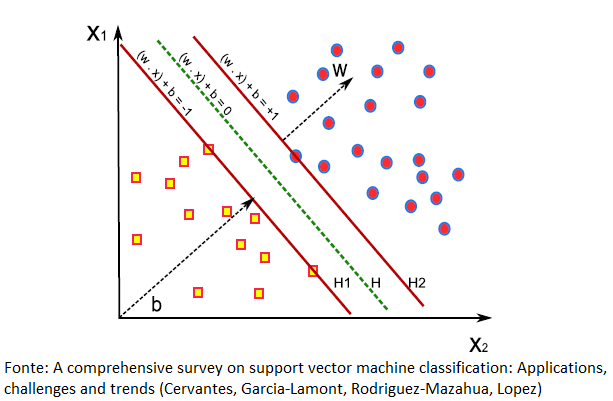

# **2.2 - SVM com Margens Suaves:**

Quando não se permite flexibilidade no hiperplano separador, o tamanho das margens é reduzido implicando em menor generalização. Assim, podemos tolerar alguns exemplos dentro das margens, relaxando as restrições impostas durante a otimização.

SVM com Margens Suaves introduz o conceito de variáveis soltas $६$ associadas a cada vetor de treinamento, além de um parâmetro $C$ (definido por experimentação) para controlar o peso do número de erros:
- caso $0 <= ६ <= 1$, o ponto se encontra do lado correto do hiperplano de separação;
- caso $६ > 1$, o ponto se encontra do lado errado do hiperplano de separação;
- quando $C$ possui valores altos permite-se poucos erros ($C → \infty$, então erro igual a 0), ou seja, baixo viés e alta variância; 
- quando $C$ possui valores pequenos permite-se mais erros, ou seja, alto viés e baixa variância.


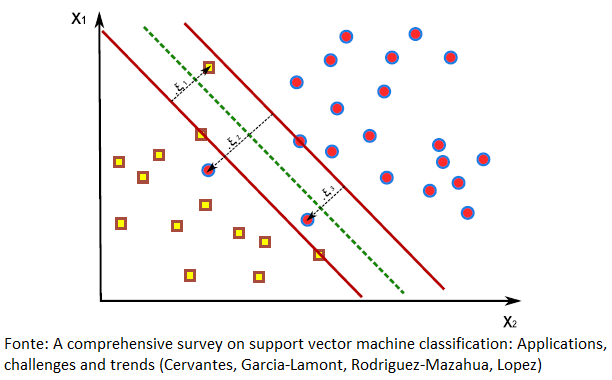

# **3 - Máquinas de Vetores de Suporte não lineares:**

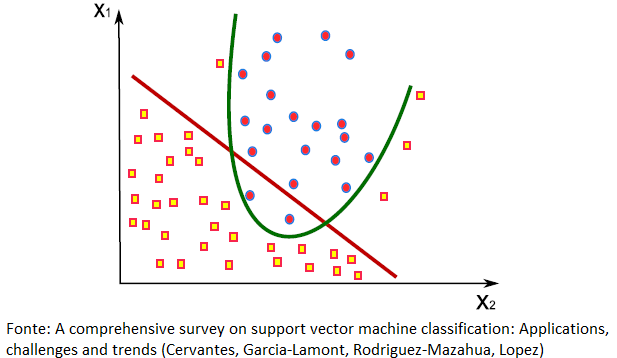

O **Teorema de Cover** garante que um espaço de características com padrões não linearmente separáveis pode ser transformado em um novo espaço em que os padrões são linearmente separáveis, desde que duas condições sejam satisfeitas:
- a transformação seja não linear; 
- a dimensão do espaço de características seja suficientemente grande. 

**Modelo não linear:**
- substitui $x$ por uma função $φ(x)$, em que $φ$ é um mapeamento não linear do espaço de características;
- a função $φ$ é conhecida como kernel de produto interno e podem ser funções polinomiais ou gaussianos.

$$W φ(x) + b = 0$$

Assim, um kernel satisfaz o Teorema de Mercer (seus autovalores devem ser maiores que zero) e é definido por:

$$k(x,x') = φ(x_i) φ(x_j)$$

**Principais Kernels:**
- Linear: 
  - é indicado quando a quantidade de atributos é maior que a quantidade de objetos;
  - estrutura convencional;

- Polinomial: 
  - polinômios de alto grau $p$ tendem a causar overfitting (definido pelo usuário);
  - é frequentemente utilizado em dados normalizados;

- Gaussiano: 
  - é indicado quando a quantidade de objetos é maior que a quantidade de atributos;
  - parâmetro $\sigma$ pode proporcionar diferentes performances (especificado pelo usuário);

- Radial Basis Function (RBF): 
  - quando $\gamma$ é baixo, a região de fronteira se torna ampla;
  - quando $\gamma$ é alto, a região de fronteira se torna muito fragmentada, criando até mesmo "ilhas";

- Sigmoide: 
  - muito utilizado em Multi Layer Perceptron;
  - apenas alguns valores de $\eta$ e $\nu$ satisfazem o Teorema de Mercer;









In [ ]:
# exemplo baseado em https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
import matplotlib.pyplot as plt
import numpy as np
import warnings

from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from matplotlib.pyplot import figure

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

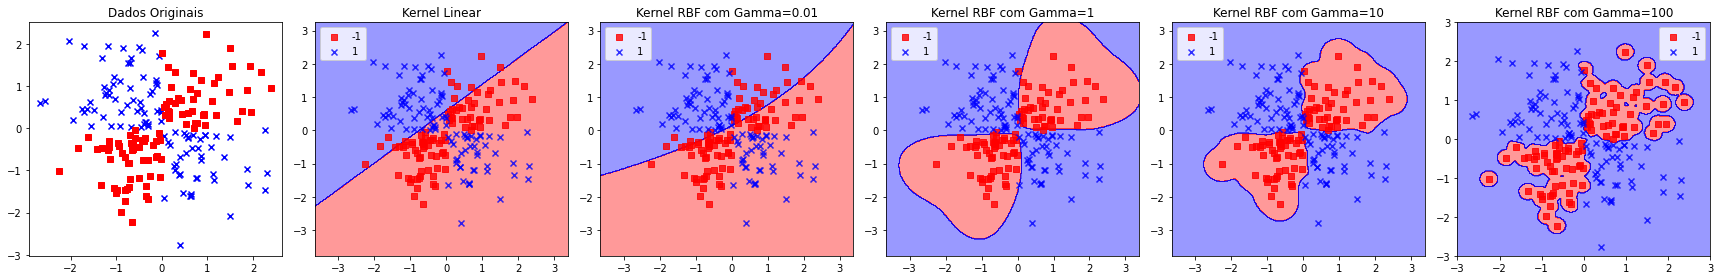

In [ ]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

figure(figsize=(24, 4))

plt.subplot(1, 6, 1)
plt.title('Dados Originais')
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.subplot(1, 6, 2)
svm1 = SVC(kernel='linear', C=1, random_state=0)
svm1.fit(X_xor, y_xor)
plt.title('Kernel Linear')
plot_decision_regions(X_xor, y_xor, classifier=svm1)
plt.legend(loc='upper left')

plt.subplot(1, 6, 3)
svm2 = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svm2.fit(X_xor, y_xor)
plt.title('Kernel RBF com Gamma=0.01')
plot_decision_regions(X_xor, y_xor, classifier=svm2)
plt.legend(loc='upper left')

plt.subplot(1, 6, 4)
svm3 = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
svm3.fit(X_xor, y_xor)
plt.title('Kernel RBF com Gamma=1')
plot_decision_regions(X_xor, y_xor, classifier=svm3)
plt.legend(loc='upper left')

plt.subplot(1, 6, 5)
svm4 = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
svm4.fit(X_xor, y_xor)
plt.title('Kernel RBF com Gamma=10')
plot_decision_regions(X_xor, y_xor, classifier=svm4)
plt.legend(loc='upper left')

plt.subplot(1, 6, 6)
svm5 = SVC(kernel='rbf', random_state=0, gamma=100, C=1)
svm5.fit(X_xor, y_xor)
plt.title('Kernel RBF com Gamma=100')
plot_decision_regions(X_xor, y_xor, classifier=svm5)
plt.legend(loc='upper left')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

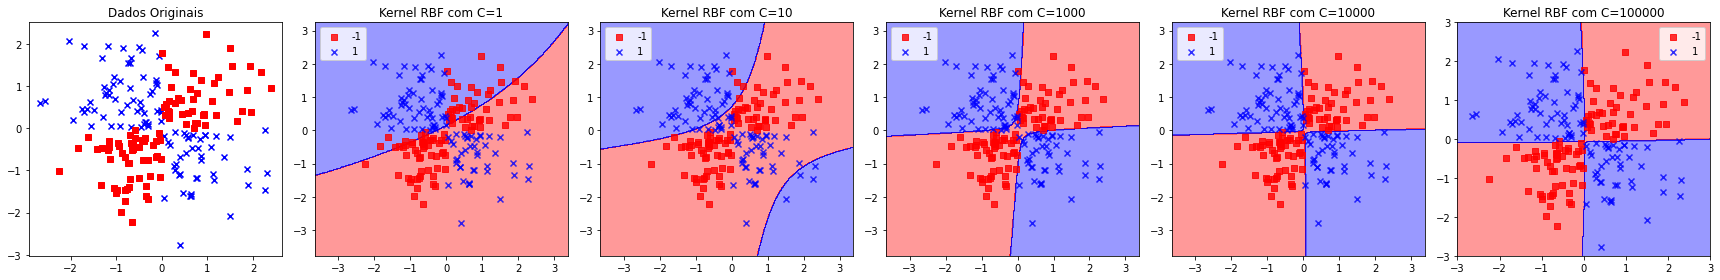

In [ ]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

figure(figsize=(24, 4))

plt.subplot(1, 6, 1)
plt.title('Dados Originais')
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.subplot(1, 6, 2)
svm1 = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svm1.fit(X_xor, y_xor)
plt.title('Kernel RBF com C=1')
plot_decision_regions(X_xor, y_xor, classifier=svm1)
plt.legend(loc='upper left')

plt.subplot(1, 6, 3)
svm2 = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
svm2.fit(X_xor, y_xor)
plt.title('Kernel RBF com C=10')
plot_decision_regions(X_xor, y_xor, classifier=svm2)
plt.legend(loc='upper left')

plt.subplot(1, 6, 4)
svm3 = SVC(kernel='rbf', random_state=0, gamma=.01, C=1000)
svm3.fit(X_xor, y_xor)
plt.title('Kernel RBF com C=1000')
plot_decision_regions(X_xor, y_xor, classifier=svm3)
plt.legend(loc='upper left')

plt.subplot(1, 6, 5)
svm4 = SVC(kernel='rbf', random_state=0, gamma=.01, C=10000)
svm4.fit(X_xor, y_xor)
plt.title('Kernel RBF com C=10000')
plot_decision_regions(X_xor, y_xor, classifier=svm4)
plt.legend(loc='upper left')

plt.subplot(1, 6, 6)
svm5 = SVC(kernel='rbf', random_state=0, gamma=.01, C=100000)
svm5.fit(X_xor, y_xor)
plt.title('Kernel RBF com C=100000')
plot_decision_regions(X_xor, y_xor, classifier=svm5)
plt.legend(loc='upper left')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# **4 - Além da classificação binária:**

Originalmente, **SVMs foram desenvolvidas para classificação binária**. No caso de classificação de múltiplas classes é necessária a utilização de algum método para **estender a SVM binária ou para combinar os resultados de várias SVMs binárias**. 

- **Decomposição um por classe (one-against-all):** 
  - baseia-se na construção de $k$ SVMs de classificação binária; 
  - na sequência, os resultados de todas as SVMs são agrupados fazendo a classificação desejada nas $k$ classes:

$$h(x) = ~~ \substack{arg max (h_i(x)) \\ 1 <=i<=k}$$

- **Separação das classes duas a duas (one-against-one):** 
  - usa uma SVM binária para distinguir cada par de classes, sendo ao todo $k(k-1)/2$ SVMs, com esquema de votação por maioria.

# **Considerações finais:**

- Intuitivamente, uma SVM é um método de aprendizagem de máquina que recebe dados de entrada e classifica-os em uma entre duas categorias, mapeando as entradas no espaço multidimensional e **utilizando regressão para encontrar um hiperplano que melhor separa duas classes de entradas**.
- Uma vez que o modelo tenha sido treinado, ele é capaz de **avaliar novas entradas em relação ao hiperplano divisor** e classificá-las em uma das duas categorias. 
- Originalmente, SVMs foram desenvolvidas para classificação binária. No caso de **classificação de múltiplas classes** é necessária a utilização de algum método para estender a SVM binária ou combinar os resultados de várias SVMs binárias.
- Se **o número de características for grande**, mas a separação das classes ocorrer somente em um subespaço linear (por exemplo, $x_1$ e $x_2$), este kernel não será encontrado facilmente pois terá muitas dimensões para procurar.
- Uma máquina de vetores de suporte é capaz de analisar os dados e extrair somente discernimentos e relações. Dessa forma, ela **funciona de maneira similar a uma caixa preta**, recebendo entradas e gerando uma saída que pode ser muito útil para encontrar padrões em dados que são muito complexos e não óbvios.
- A **principal desvantagem** é o custo excessivo em grandes datasets, pois a matriz do kernel de treinamento cresce quadraticamente.
- Outra desvantagem é em relação a **dados desbalanceados**, pois encontrar o hiperplano separador com diferentes proporções pode influenciar drasticamente o hiperplano ótimo.